In [3]:
pip install pandas numpy matplotlib seaborn scikit-learn xgboost streamlit notebook


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.2/10.2 MB 72.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.9/6.9 MB 101.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 73.4 MB/s eta 0:00:00


✅ Dataset Loaded Successfully!
Shape: (1000, 14)


,Date,Location,Latitude,Longitude,Temperature (°C),Humidity (%),Wind_Speed (m/s),Solar_Irradiance (W/m²),Cloud_Cover (%),Precipitation (mm),Sunshine_Hours,Month,Season,Solar_Energy_Output (kWh)
0,2024-01-01,Kolkata,22.5726,88.3639,39.6,62.968984,3.43,895.9,34.384859,2.6,6.2,1,Winter,43.34
1,2024-01-02,Kolkata,22.5726,88.3639,33.6,27.812008,2.12,710.9,0.000000,1.9,7.6,1,Winter,35.13
2,2024-01-03,Ahmedabad,23.0225,72.5714,30.6,51.398821,4.69,664.3,0.000000,1.4,5.5,1,Winter,33.95
3,2024-01-04,Delhi,28.6139,77.2090,32.5,17.909663,3.45,641.1,23.502101,1.1,10.3,1,Winter,35.12
4,2024-01-05,Kolkata,22.5726,88.3639,24.9,50.909769,2.76,841.7,48.057567,0.2,7.5,1,Winter,43.66



📌 Added Feature Engineering Columns!


,Date,Location,Latitude,Longitude,Temperature (°C),Humidity (%),Wind_Speed (m/s),Solar_Irradiance (W/m²),Cloud_Cover (%),Precipitation (mm),Sunshine_Hours,Month,Season,Solar_Energy_Output (kWh),Hour,Weekday,Temp_Roll,Humidity_Roll,Irradiance_Roll
0,2024-01-01,Kolkata,22.5726,88.3639,39.6,62.968984,3.43,895.9,34.384859,2.6,6.2,1,Winter,43.34,0,0,39.600000,62.968984,895.900000
1,2024-01-02,Kolkata,22.5726,88.3639,33.6,27.812008,2.12,710.9,0.000000,1.9,7.6,1,Winter,35.13,0,1,36.600000,45.390496,803.400000
2,2024-01-03,Ahmedabad,23.0225,72.5714,30.6,51.398821,4.69,664.3,0.000000,1.4,5.5,1,Winter,33.95,0,2,34.600000,47.393271,757.033333
3,2024-01-04,Delhi,28.6139,77.2090,32.5,17.909663,3.45,641.1,23.502101,1.1,10.3,1,Winter,35.12,0,3,32.233333,32.373497,672.100000
4,2024-01-05,Kolkata,22.5726,88.3639,24.9,50.909769,2.76,841.7,48.057567,0.2,7.5,1,Winter,43.66,0,4,29.333333,40.072751,715.700000


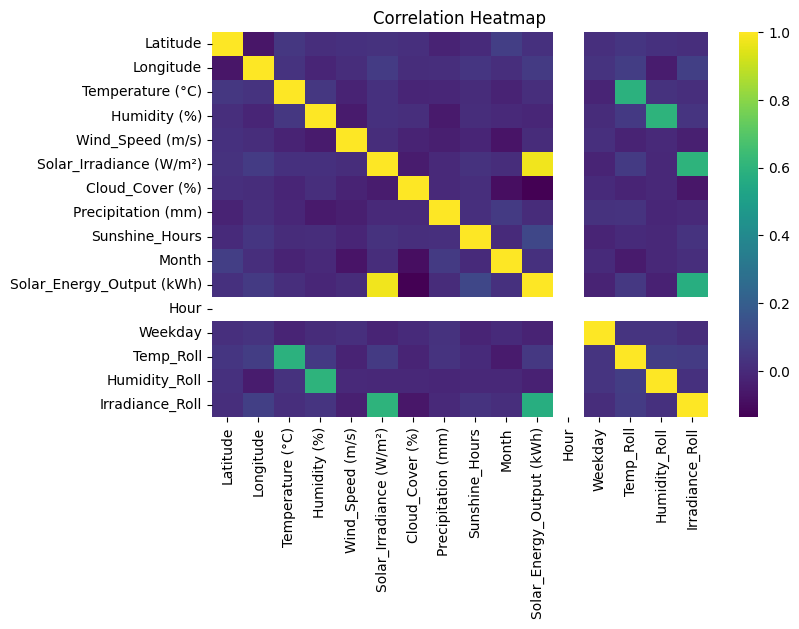

Remaining Object Columns: Series([], dtype: object)
Training Samples: 800, Testing Samples: 200

🌲 Random Forest Model Trained!
⚡ XGBoost Model Trained!

📊 Random Forest Evaluation:
MAE:  1.033
MSE:  1.522
RMSE: 1.234
R²:   0.937

📊 XGBoost Evaluation:
MAE:  0.985
MSE:  1.409
RMSE: 1.187
R²:   0.941


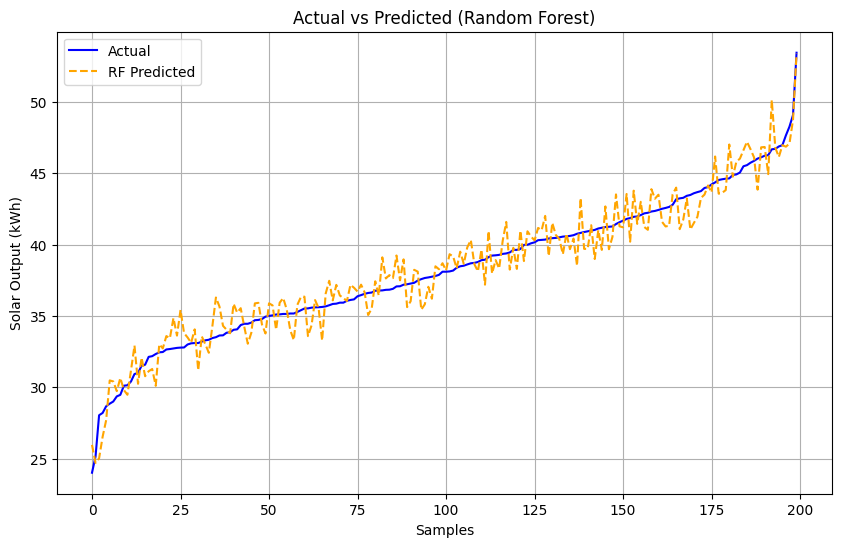

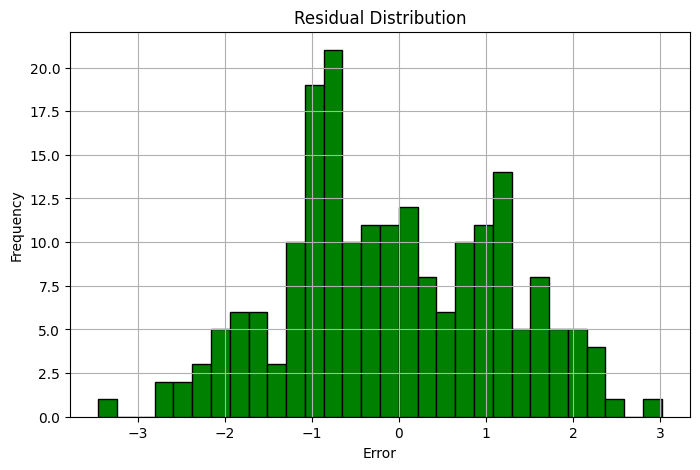


🔮 Future Predictions:


,Predicted Energy (kWh)
0,32.922533
1,33.118867
2,40.204733
3,34.306733
4,41.358533
5,41.169267
6,38.232867
7,43.633267
8,39.197800
9,43.779800


In [7]:
# ==========================
# 📌 IMPORTS
# ==========================
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

from xgboost import XGBRegressor

# ==========================
# 📌 LOAD DATA
# ==========================
df = pd.read_csv("solar_energy_india_dataset.csv")
print("✅ Dataset Loaded Successfully!")
print("Shape:", df.shape)
display(df.head())

# ==========================
# 📌 FEATURE ENGINEERING (NEW)
# ==========================
df['Date'] = pd.to_datetime(df['Date'])
df['Hour'] = df['Date'].dt.hour
df['Weekday'] = df['Date'].dt.weekday
df['Month'] = df['Date'].dt.month

# Rolling averages (3-day window)
df['Temp_Roll'] = df['Temperature (°C)'].rolling(window=3, min_periods=1).mean()
df['Humidity_Roll'] = df['Humidity (%)'] .rolling(window=3, min_periods=1).mean()
df['Irradiance_Roll'] = df['Solar_Irradiance (W/m²)'].rolling(window=3, min_periods=1).mean()

print("\n📌 Added Feature Engineering Columns!")
display(df.head())

# ==========================
# 📌 EDA (SHORT)
# ==========================
plt.figure(figsize=(8,5))
sns.heatmap(df.corr(numeric_only=True), annot=False, cmap="viridis")
plt.title("Correlation Heatmap")
plt.show()

# ==========================
# 📌 ENCODING
# ==========================
df_encoded = pd.get_dummies(df, columns=['Location', 'Season'], drop_first=True)

# ==========================
# 📌 TRAIN-TEST SPLIT
# ==========================
X = df_encoded.drop(['Solar_Energy_Output (kWh)', 'Date'], axis=1)
y = df_encoded['Solar_Energy_Output (kWh)']

# Ensure no object columns remain
X = pd.get_dummies(X, drop_first=True)

print("Remaining Object Columns:", X.dtypes[X.dtypes == 'object'])

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

print(f"Training Samples: {X_train.shape[0]}, Testing Samples: {X_test.shape[0]}")

# ==========================
# 📌 RANDOM FOREST MODEL
# ==========================
rf = RandomForestRegressor(n_estimators=150, random_state=42)
rf.fit(X_train, y_train)
print("\n🌲 Random Forest Model Trained!")

rf_pred = rf.predict(X_test)

# ==========================
# 📌 XGBOOST MODEL
# ==========================
xgb = XGBRegressor(
    n_estimators=200,
    learning_rate=0.05,
    max_depth=6,
    subsample=0.8,
    colsample_bytree=0.8,
    random_state=42
)

xgb.fit(X_train, y_train)
print("⚡ XGBoost Model Trained!")

xgb_pred = xgb.predict(X_test)

# ==========================
# 📌 METRICS FUNCTION
# ==========================
def evaluate_model(name, y_true, y_pred):
    mae = mean_absolute_error(y_true, y_pred)
    mse = mean_squared_error(y_true, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_true, y_pred)

    print(f"\n📊 {name} Evaluation:")
    print(f"MAE:  {mae:.3f}")
    print(f"MSE:  {mse:.3f}")
    print(f"RMSE: {rmse:.3f}")
    print(f"R²:   {r2:.3f}")

# Evaluate both models
evaluate_model("Random Forest", y_test, rf_pred)
evaluate_model("XGBoost", y_test, xgb_pred)

# ==========================
# 📌 VISUALIZATION — ACTUAL VS PREDICTED (RF)
# ==========================
sorted_idx = np.argsort(y_test.values)
y_test_sorted = y_test.values[sorted_idx]
rf_pred_sorted = rf_pred[sorted_idx]

plt.figure(figsize=(10,6))
plt.plot(y_test_sorted, label="Actual", color="blue")
plt.plot(rf_pred_sorted, label="RF Predicted", color="orange", linestyle="--")
plt.title("Actual vs Predicted (Random Forest)")
plt.xlabel("Samples")
plt.ylabel("Solar Output (kWh)")
plt.legend()
plt.grid(True)
plt.show()

# ==========================
# 📌 RESIDUAL PLOT (RF)
# ==========================
residuals = y_test - rf_pred

plt.figure(figsize=(8,5))
plt.hist(residuals, bins=30, color='green', edgecolor='black')
plt.title("Residual Distribution")
plt.xlabel("Error")
plt.ylabel("Frequency")
plt.grid(True)
plt.show()

# ==========================
# 📌 FUTURE PREDICTIONS
# ==========================
future_data = X_test.sample(10, random_state=42)
future_pred = rf.predict(future_data)

future_df = pd.DataFrame({"Predicted Energy (kWh)": future_pred})
print("\n🔮 Future Predictions:")
display(future_df)
